In [1]:
from collections import OrderedDict
from enum import Enum

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import torch
import numpy as np

In [3]:
from curlyBrace import curlyBrace

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [5]:
# Formatting & autoreload stuff
%load_ext lab_black
%load_ext autoreload
%autoreload 2
# %matplotlib ipympl

In [6]:
loc_rand = torch.randn((34, 34)) * 0.2
loc_rand.shape

torch.Size([34, 34])

In [7]:
# loc_rand2 = torch.randn((34, 34)) * 0.2
# loc_rand2.shape

In [8]:
blocs = torch.block_diag(
    torch.ones((4, 4)),
    torch.ones((6, 6)),
    torch.ones((4, 4)),
    torch.ones((6, 6)),
    torch.ones((5, 5)),
    torch.ones((2, 2)),
    torch.ones((7, 7)),
)
blocs.shape

torch.Size([34, 34])

In [9]:
# blocs2 = torch.block_diag(
#     torch.ones((6, 6)),
#     torch.ones((4, 4)),
#     torch.ones((5, 5)),
#     torch.ones((3, 3)),
#     torch.ones((7, 7)),
# )
# blocs2.shape

In [10]:
loc = blocs + loc_rand

In [11]:
# loc2 = blocs2 + loc_rand2

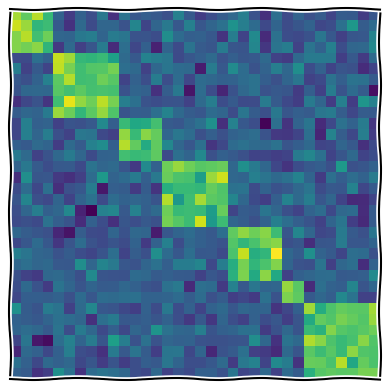

In [12]:
with plt.xkcd():
    fig, ax = plt.subplots()
    ax.matshow(loc)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()

In [13]:
odor_diag = torch.zeros(3, 3)
odor_diag.fill_diagonal_(1)
odor_diag

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [14]:
# odor_rand = torch.randn((3, 3)) * 0.2
odor_rand = torch.zeros((3, 3))
odor_rand

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [15]:
odor = odor_diag + odor_rand
odor

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

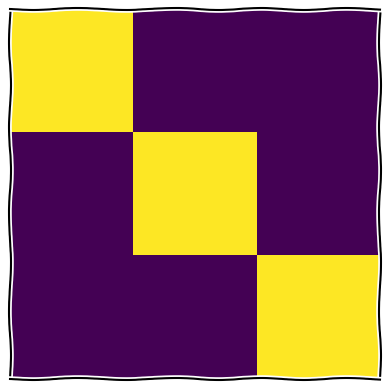

In [16]:
with plt.xkcd():
    fig, ax = plt.subplots()
    ax.matshow(odor)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()

In [17]:
odor_loc = torch.randn((34, 3))
odor_loc.T

tensor([[ 0.4252, -0.9329,  3.3779, -0.7565,  0.6605, -0.0342,  0.6211,  0.1507,
          1.4275,  1.0416,  0.3865, -1.6763,  0.7225, -1.1113,  0.6976, -2.1637,
         -0.0893,  0.4548,  0.2634,  1.2281, -0.2909,  1.8690,  1.6484, -0.5740,
          0.9553, -1.1156, -0.1765, -1.0822,  0.0164, -0.2709, -0.0341,  1.5478,
         -0.5590,  0.4928],
        [ 0.1560, -0.0060,  1.3624,  0.6596,  0.4548,  0.5334,  1.1234,  0.5336,
         -0.0522,  0.4129,  1.0441, -0.8169, -1.6427, -0.3845,  0.2083,  0.1639,
          0.6953,  0.5728, -1.3036,  0.6948,  0.3565,  0.1487,  1.3674,  1.5247,
         -0.6281, -0.6956,  1.1176, -2.0878,  0.4889, -0.6590, -2.0770, -0.1486,
          1.1743, -0.4415],
        [ 0.7963, -0.2915,  0.5766, -0.0810, -0.2397, -1.2915, -0.9830,  1.5498,
         -0.0837,  0.9567,  1.2316, -1.0648, -0.7203,  1.0475,  0.1758, -1.3708,
          1.0102,  0.0356, -1.4348,  0.2360, -2.1120,  0.2483, -0.0192,  0.1312,
         -0.1428,  3.4741,  0.9778,  2.1099,  1.8824,

In [18]:
# odor_loc2 = torch.randn((25, 3))

In [19]:
tmp_mat1 = torch.cat((loc, odor_loc), dim=1)
tmp_mat1.shape

torch.Size([34, 37])

In [20]:
tmp_mat2 = torch.cat((odor_loc.T, odor), dim=1)
tmp_mat2.shape

torch.Size([3, 37])

In [21]:
neural = torch.cat((tmp_mat1, tmp_mat2), dim=0)
neural.shape

torch.Size([37, 37])

In [22]:
# simu = torch.cat(
#     (torch.cat((loc2, odor_loc2), dim=1), torch.cat((odor_loc2.T, odor), dim=1)), dim=0
# )
# simu.shape

In [23]:
braces = []
braces.append(
    {
        "p1": [-2, 0],
        "p2": [-2, 20],
        "str_text": "cartesian",
    }
)
braces.append(
    {
        "p1": [-2, 21],
        "p2": [-2, 34],
        "str_text": "polar",
    }
)
braces.append(
    {
        "p1": [-2, 35],
        "p2": [-2, 37],
        "str_text": "odor",
    }
)
# braces.append(
#     {
#         "p1": [0, -2],
#         "p2": [24, -2],
#         "str_text": "location",
#     }
# )
# braces.append(
#     {
#         "p1": [25, -2],
#         "p2": [27, -2],
#         "str_text": "odor",
#     }
# )

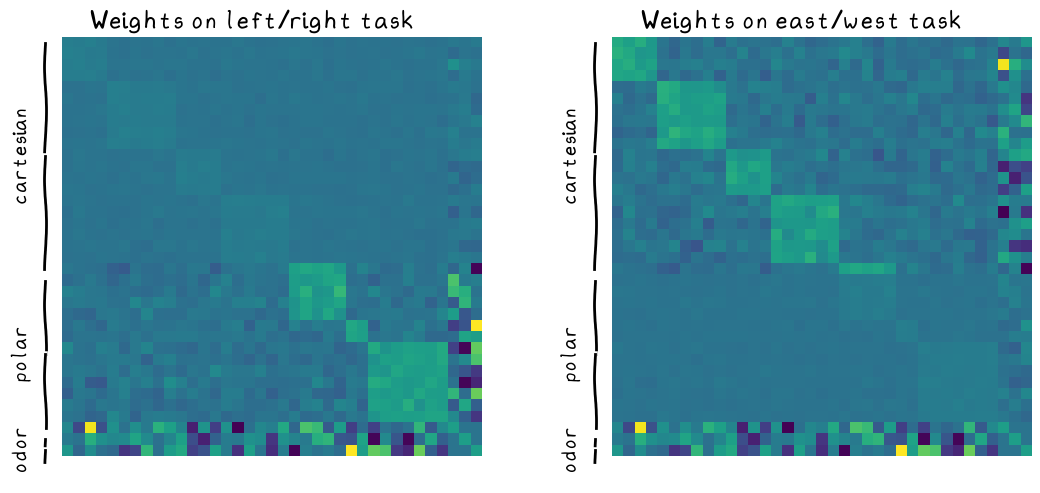

In [24]:
with plt.xkcd():
    neural[0:20, :] = neural[0:20, :] / 5

    fig, ax = plt.subplots(1, 2, figsize=(13, 8))
    ax[0].matshow(neural)
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    # ax.set_xlabel('time')
    # ax.set_xlabel("Neural data", fontsize=30)
    ax[0].set_title("Weights on left/right task")
    neural[0:20, :] = neural[0:20, :] * 5
    neural[21:34, :] = neural[21:34, :] / 5
    ax[1].matshow(neural)
    ax[1].set_xticks([])
    ax[1].set_yticks([])
    ax[1].set_title("Weights on east/west task")

    for axi in ax:
        for spine in axi.spines.values():
            spine.set_visible(False)

        for idx, brace in enumerate(braces):
            curlyBrace(
                fig=fig,
                ax=axi,
                p1=brace["p1"],
                p2=brace["p2"],
                k_r=0.0,
                bool_auto=False,
                str_text=brace["str_text"],
                color="black",
                lw=2,
                int_line_num=2,
            )
    fig.patch.set_alpha(0)
    fig.patch.set_facecolor("white")

    plt.show()

## Box plot

In [25]:
agents_pop_num = 10
tmp = ["no translation" for _ in range(agents_pop_num)]
tmp.extend(["cartesian\ntranslated" for _ in range(agents_pop_num)])
tmp.extend(["polar\ntranslated" for _ in range(agents_pop_num)])
df_transl = pd.DataFrame(
    {
        "task_solved": np.concatenate(
            [
                np.random.uniform(low=0.8, high=1.0, size=agents_pop_num),
                np.random.uniform(low=0.8, high=1.0, size=agents_pop_num),
                np.random.uniform(low=0.8, high=1.0, size=agents_pop_num),
            ]
        ),
        "translated_experiment": tmp,
    }
)
df_transl

,task_solved,translated_experiment
0,0.868027,no translation
1,0.941283,no translation
2,0.950066,no translation
3,0.939725,no translation
4,0.994049,no translation
5,0.981639,no translation
6,0.802767,no translation
7,0.952506,no translation
8,0.929215,no translation
9,0.870398,no translation


In [26]:
tmp = ["left/right\ncorrect\nangle" for _ in range(agents_pop_num)]
tmp.extend(["left/right\nincorrect\nangle" for _ in range(agents_pop_num)])
tmp.extend(["east/west\ncorrect\nangle" for _ in range(agents_pop_num)])
tmp.extend(["east/west\nincorrect\nangle" for _ in range(agents_pop_num)])
df_wrong_angle = pd.DataFrame(
    {
        "task_solved": np.concatenate(
            [
                np.random.uniform(low=0.8, high=1.0, size=agents_pop_num),
                np.random.uniform(low=0.8, high=1.0, size=agents_pop_num),
                np.random.uniform(low=0.8, high=1.0, size=agents_pop_num),
                np.random.uniform(low=0.0, high=0.2, size=agents_pop_num),
            ]
        ),
        "incorrect_angle_experiment": tmp,
    }
)
df_wrong_angle

,task_solved,incorrect_angle_experiment
0,0.852961,left/right\ncorrect\nangle
1,0.920163,left/right\ncorrect\nangle
2,0.973680,left/right\ncorrect\nangle
3,0.997017,left/right\ncorrect\nangle
4,0.856845,left/right\ncorrect\nangle
5,0.901234,left/right\ncorrect\nangle
6,0.865727,left/right\ncorrect\nangle
7,0.934088,left/right\ncorrect\nangle
8,0.891860,left/right\ncorrect\nangle
9,0.860144,left/right\ncorrect\nangle


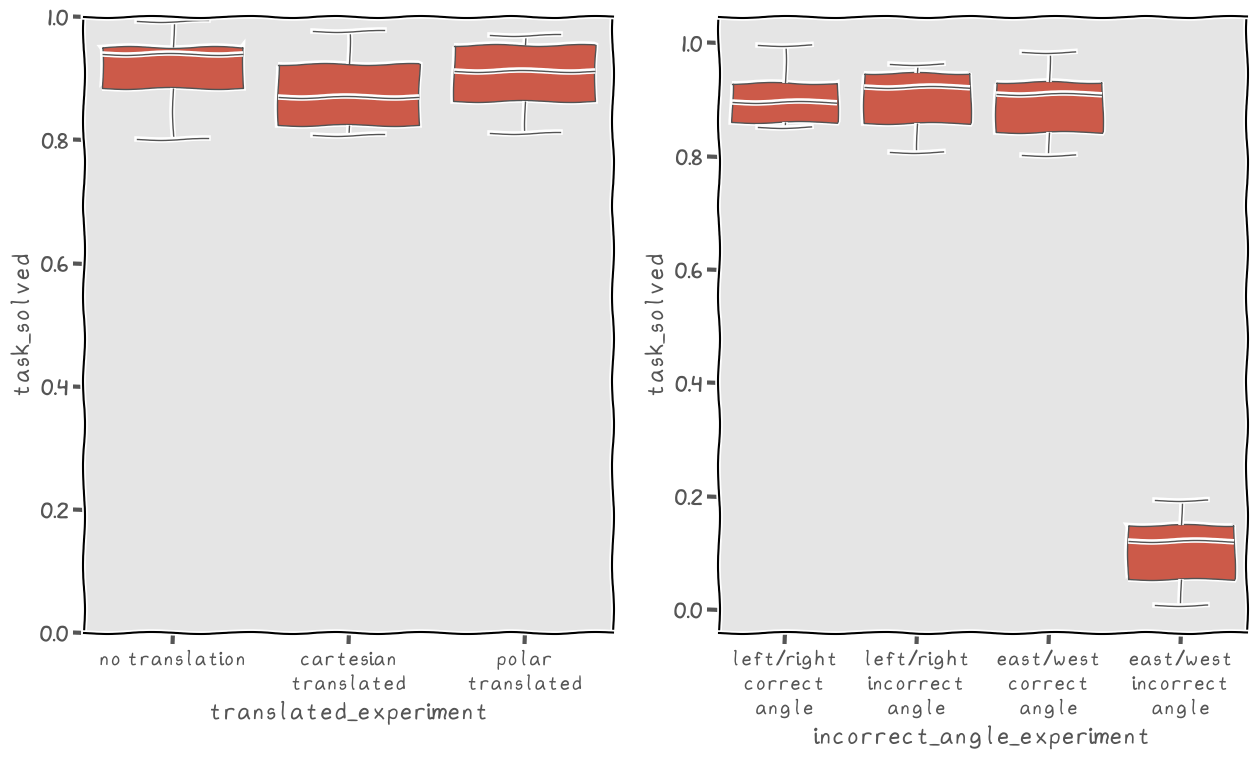

In [27]:
plt.style.use("ggplot")
with plt.xkcd():
    fig, ax = plt.subplots(1, 2, figsize=(15, 8))

    sns.boxplot(data=df_transl, x="translated_experiment", y="task_solved", ax=ax[0])
    ax[0].set(ylim=(0, 1))

    sns.boxplot(
        data=df_wrong_angle, x="incorrect_angle_experiment", y="task_solved", ax=ax[1]
    )

    fig.patch.set_alpha(0)
    fig.patch.set_facecolor("white")

    plt.show()

## Weights

In [28]:
class Cues(Enum):
    NoOdor = 0
    OdorA = 1
    OdorB = 2


CONTEXTS_LABELS = OrderedDict(
    [
        # (LightCues.North, "Pre odor - North light"),
        # (LightCues.South, "Pre odor - South light"),
        # (OdorID.A, "Post odor - Odor A"),
        # (OdorID.B, "Post odor - Odor B"),
        (Cues.NoOdor, "Pre odor"),
        (Cues.OdorA, "Odor A"),
        (Cues.OdorB, "Odor B"),
    ]
)
rows = 5
cols = 5
tiles_locations = torch.arange(rows * cols, device=device)

In [29]:
# Construct input dictionnary to be fed to the network
input_cond = OrderedDict({})
for cue_obj, cue_txt in CONTEXTS_LABELS.items():
    for loc in tiles_locations:
        current_state = torch.tensor([loc, cue_obj.value], device=device)
        input_cond[f"{loc}-{cue_txt}"] = current_state.float()
input_cond

OrderedDict([('0-Pre odor', tensor([0., 0.])),
             ('1-Pre odor', tensor([1., 0.])),
             ('2-Pre odor', tensor([2., 0.])),
             ('3-Pre odor', tensor([3., 0.])),
             ('4-Pre odor', tensor([4., 0.])),
             ('5-Pre odor', tensor([5., 0.])),
             ('6-Pre odor', tensor([6., 0.])),
             ('7-Pre odor', tensor([7., 0.])),
             ('8-Pre odor', tensor([8., 0.])),
             ('9-Pre odor', tensor([9., 0.])),
             ('10-Pre odor', tensor([10.,  0.])),
             ('11-Pre odor', tensor([11.,  0.])),
             ('12-Pre odor', tensor([12.,  0.])),
             ('13-Pre odor', tensor([13.,  0.])),
             ('14-Pre odor', tensor([14.,  0.])),
             ('15-Pre odor', tensor([15.,  0.])),
             ('16-Pre odor', tensor([16.,  0.])),
             ('17-Pre odor', tensor([17.,  0.])),
             ('18-Pre odor', tensor([18.,  0.])),
             ('19-Pre odor', tensor([19.,  0.])),
             ('20-Pre odor', t

In [63]:
# Get the number of neurons in the layer inspected
neurons_num = 100

# Get the activations from the network
# activations_layer = (
#     torch.ones((len(input_cond), neurons_num), device=DEVICE) * torch.nan
# )
# for idx, (cond, input_val) in enumerate(input_cond.items()):
#     activations_layer[idx, :] = torch.randn((1, neurons_num))
activations_layer = torch.randn((len(input_cond), neurons_num), device=device) / 5

In [64]:
activations_layer = activations_layer + torch.block_diag(
    torch.ones((4, 6)),
    torch.ones((6, 7)),
    torch.ones((4, 10)),
    torch.ones((6, 7)),
    torch.ones((5, 6)),
    torch.ones((2, 3)),
    torch.ones((7, 8)),
    torch.ones((5, 6)),
    torch.ones((10, 12)),
    torch.ones((3, 4)),
    torch.ones((15, 16)),
    torch.ones((5, 6)),
    torch.ones((3, 9)),
)
activations_layer.shape

torch.Size([75, 100])

In [65]:
activations_layer_df = pd.DataFrame(activations_layer.cpu())  # , columns=cols)
activations_layer_df["Input"] = list(input_cond.keys())
activations_layer_df.set_index("Input", inplace=True)
activations_layer_df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Input,,,,,,,,,,,,,,,,,,,,,
0-Pre odor,1.142932,1.183914,0.919318,0.599412,1.160987,1.036743,-0.175708,0.132563,0.118538,0.437411,...,-0.331606,0.006022,-0.066238,0.405338,0.350637,0.021369,0.164106,0.175336,0.371847,0.234477
1-Pre odor,0.976967,1.014543,1.133942,1.136158,0.975377,0.721882,-0.150101,-0.551003,-0.151991,0.009384,...,-0.147852,0.172478,0.071999,0.114520,-0.168225,-0.291792,-0.132960,-0.234823,0.233014,-0.150602
2-Pre odor,1.358037,0.819788,1.174125,0.753457,1.271748,0.978722,-0.214014,0.358712,-0.226677,-0.256208,...,-0.186552,0.066578,0.032812,0.152684,-0.085850,-0.074460,0.126718,0.248300,0.122972,0.344546
3-Pre odor,0.862619,1.081699,0.928412,1.134399,0.895997,1.289743,-0.168025,0.161941,-0.733913,-0.115724,...,-0.198356,0.006928,-0.219936,-0.271755,-0.363302,-0.268571,-0.150753,0.141786,-0.158458,0.095757
4-Pre odor,0.042898,0.276044,-0.008682,-0.032490,-0.094638,0.087218,1.383584,1.311894,0.955168,0.963003,...,0.032781,-0.247721,0.032937,0.060646,0.024256,-0.253901,-0.107318,-0.258324,0.103908,0.026839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20-Odor B,0.192444,0.219391,0.077599,0.007182,-0.516378,-0.042145,-0.078559,0.094164,0.060275,-0.418047,...,0.625152,0.451466,-0.016984,-0.335056,-0.112608,0.003301,-0.218561,0.103065,-0.083569,-0.126193
21-Odor B,0.116381,0.405513,0.214900,-0.221426,0.197408,0.123052,-0.047088,-0.256617,-0.403654,0.226811,...,0.961479,0.011470,0.445739,-0.326835,-0.113021,-0.217595,0.044586,0.271684,0.099564,0.043326
22-Odor B,-0.079866,-0.193108,0.121294,0.276693,-0.164833,-0.002199,-0.333044,-0.063771,-0.108237,-0.158892,...,0.112450,1.076524,0.753670,1.256584,0.907563,0.699949,1.048838,0.982139,1.350646,1.037411


In [66]:
def plot_activations(activations_layer_df, input_cond, labels, layer_inspected):
    # Create a categorical palette to identify the clusters
    # cluster_palette = sns.color_palette("Pastel2")
    cluster_palette = sns.color_palette("Accent")
    cluster_colors = dict(zip(list(labels.values()), cluster_palette))
    row_colors = [cluster_colors[cond.split("-")[1]] for cond in input_cond.keys()]
    row_colors_serie = pd.Series(row_colors)
    row_colors_serie = row_colors_serie.set_axis(list(input_cond.keys()))

    cmap = "viridis"
    chart = sns.clustermap(activations_layer_df, cmap=cmap, row_colors=row_colors_serie)
    chart.ax_heatmap.set_xlabel(f"Neurons activations in layer {str(layer_inspected)}")

    for label, col_val in cluster_colors.items():
        chart.ax_col_dendrogram.bar(0, 0, color=col_val, label=label, linewidth=0)
    chart.ax_col_dendrogram.legend(loc="center", bbox_to_anchor=(1.1, 0.7))  # , ncol=6)

    chart.fig.patch.set_alpha(0)
    chart.fig.patch.set_facecolor("white")
    plt.show()

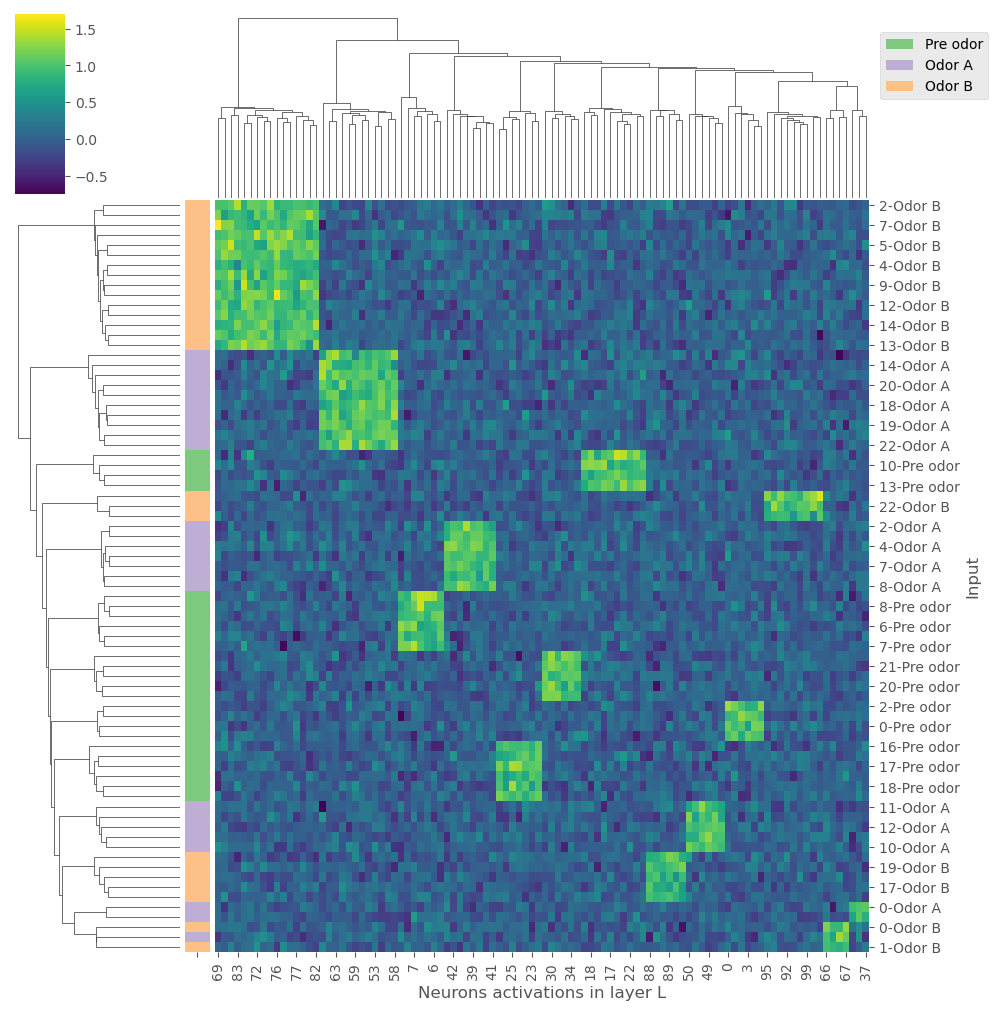

In [67]:
plot_activations(
    activations_layer_df=activations_layer_df,
    input_cond=input_cond,
    labels=CONTEXTS_LABELS,
    layer_inspected="L",
)